In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [5]:
x

array([[-1.31242765, -1.21607533],
       [-0.94353538, -0.90463833],
       [ 0.23917282,  1.43026692],
       ...,
       [ 1.48395731, -0.64433337],
       [-1.07231554, -0.99103786],
       [ 0.84882559, -0.00290258]])

In [6]:
y

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,

In [23]:
pd.DataFrame(x)[0]

0     -1.312428
1     -0.943535
2      0.239173
3      3.257375
4     -1.099676
         ...   
995   -0.397413
996    0.484156
997    1.483957
998   -1.072316
999    0.848826
Name: 0, Length: 1000, dtype: float64

In [24]:
pd.DataFrame(x)[1]

0     -1.216075
1     -0.904638
2      1.430267
3      3.146424
4      0.317809
         ...   
995   -0.347458
996   -0.461019
997   -0.644333
998   -0.991038
999   -0.002903
Name: 1, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

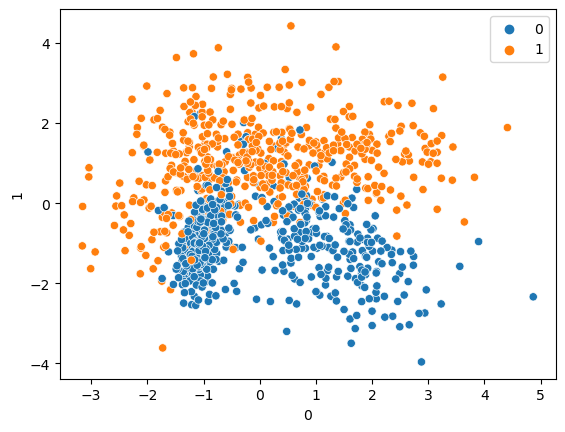

In [25]:
sns.scatterplot(x = pd.DataFrame(x)[0],y= pd.DataFrame(x)[1],hue=y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)

In [30]:
x_train.shape,y_train.shape

((670, 2), (670,))

In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")

In [46]:
classifier

SVC(kernel='linear')

In [47]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [48]:
classifier.coef_

array([[-0.05166669,  1.4220009 ]])

In [49]:
y_pred = classifier.predict(x_test)

In [50]:
from sklearn.metrics import r2_score,accuracy_score,classification_report

In [51]:
r2_score(y_test,y_pred)

0.3937389770723102

In [52]:
accuracy_score(y_test,y_pred)

0.8484848484848485

In [53]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.86      0.85       168\n           1       0.85      0.83      0.84       162\n\n    accuracy                           0.85       330\n   macro avg       0.85      0.85      0.85       330\nweighted avg       0.85      0.85      0.85       330\n'

In [54]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameter = {
    'C':[1,2,3,4,5,10,20,50,100],
    'gamma':[0.2,1,0.4,0.001,0.003],
    'kernel':['linear']
}

In [58]:
model = GridSearchCV(classifier,param_grid=parameter,cv=5,verbose=3)

In [60]:
model

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [61]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.866 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.888 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.866 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.881 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.873 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.866 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.888 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.866 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.881 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.4, kernel=linear;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.4, kernel=linear

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [62]:
y_pred1 = model.predict(x_test)

In [63]:
r2_score(y_test,y_pred1)

0.3937389770723102

In [64]:
model.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'linear'}

In [65]:
model.best_score_

0.8746268656716417